In [8]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Configurações de visualização
plt.style.use('ggplot')
sns.set_theme()
plt.rcParams['figure.figsize'] = (10, 6)

# Definir o caminho dos dados
path = "/content/drive/MyDrive/Mestrado/Disciplinas/6.  Elaboração de dissertação/Experimentos/03. Consolidação dos dados/dados_selecionados"

Mounted at /content/drive


In [12]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo e cores
sns.set_theme(style="whitegrid")
palette = {'Métricas combinadas': '#0055d4ff', 'Métricas de hardware': '#ff931dff'}

# Função para criar gráfico com segundo eixo
def comparar_dupla_com_eixo_secundario(dataset_hardware, dataset_combinadas, metric, title, ylabel_primary, ylabel_secondary):
    # Criar eixo primário
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.set_facecolor('white')  # Fundo branco
    ax1.set_title(title, fontsize=16)
    ax1.set_xlabel("Tempo", fontsize=14)
    ax1.set_ylabel(ylabel_primary, fontsize=14, color=palette['Métricas combinadas'])

    # Plotar métricas de hardware e combinadas
    ax1.plot(dataset_hardware['timestamp'], dataset_hardware[metric], label='Hardware', color=palette['Métricas de hardware'], linewidth=1.5)
    ax1.plot(dataset_combinadas['timestamp'], dataset_combinadas[metric], label='Combinadas', color=palette['Métricas combinadas'], linewidth=1.5)
    ax1.tick_params(axis='y', labelcolor=palette['Métricas combinadas'])
    ax1.legend(loc="upper left", fontsize=12)

    # Criar eixo secundário
    ax2 = ax1.twinx()
    ax2.set_ylabel(ylabel_secondary, fontsize=14, color="black")

    # Plotar escalonamento para ambos os datasets
    ax2.plot(dataset_hardware['timestamp'], dataset_hardware["05_escalabilidade_reticulum"],
             label='Escalonamento (Hardware)', linestyle='--', color='#8B0000', linewidth=1.5, alpha=0.9)  # Vermelho escuro
    ax2.plot(dataset_combinadas['timestamp'], dataset_combinadas["05_escalabilidade_reticulum"],
             label='Escalonamento (Combinadas)', linestyle='--', color='#006400', linewidth=1.5, alpha=0.9)  # Verde escuro
    ax2.tick_params(axis='y', labelcolor="black")
    ax2.set_ylim(0, 5)  # Ajuste o limite do eixo de acordo com o número de réplicas
    ax2.legend(loc="upper right", fontsize=12)

    # Ajustar layout
    fig.tight_layout()
    plt.show()

# Caminho base para os arquivos
path_base = "/content/drive/MyDrive/Mestrado/Disciplinas/6.  Elaboração de dissertação/Experimentos/03. Consolidação dos dados/dados_consolidados"

# Ajustar os nomes dos arquivos após identificar
hardware_file = "hardware.csv"  # Substitua pelo nome correto
combinadas_file = "evento_hardware.csv"  # Substitua pelo nome correto

# Carregar os datasets
hardware_df = pd.read_csv(path_base + hardware_file)
combinadas_df = pd.read_csv(path_base + combinadas_file)

# Definir métricas e títulos
metrics = [
    ("29_cpu_reticulum", "Evolução do dimensionamento de réplicas em relação ao uso de CPU do microsserviço Reticulum", "Uso de CPU (%)", "Número de Réplicas"),
    ("38_total_memoria_reticulum", "Evolução do dimensionamento de réplicas em relação ao uso de Memória do microsserviço Reticulum", "Memória Total (Bytes)", "Número de Réplicas"),
    ("69_transmissao_dados_reticulum", "Evolução do dimensionamento de réplicas em relação à Transmissão de Dados do microsserviço Reticulum", "Transmissão de Dados (Bytes)", "Número de Réplicas")
]

# Gerar gráficos para cada métrica
for metric, title, ylabel_primary, ylabel_secondary in metrics:
    comparar_dupla_com_eixo_secundario(hardware_df, combinadas_df, metric, title, ylabel_primary, ylabel_secondary)








FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Mestrado/Disciplinas/6.  Elaboração de dissertação/Experimentos/03. Consolidação dos dados/dados_consolidadoshardware.csv'

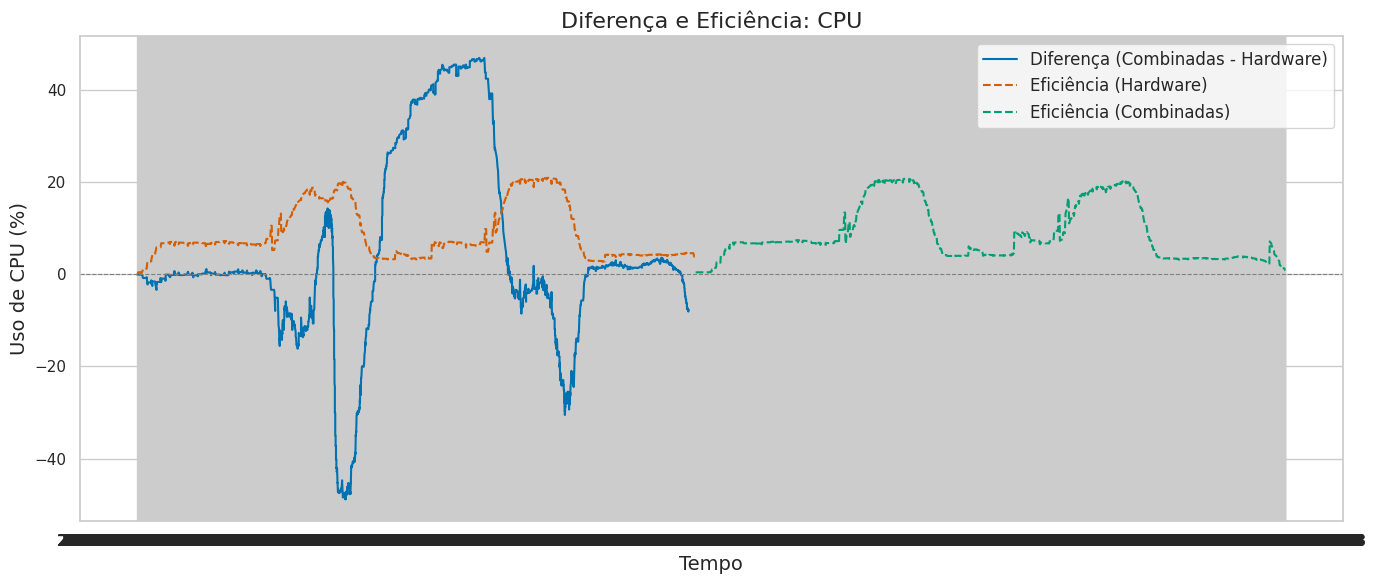

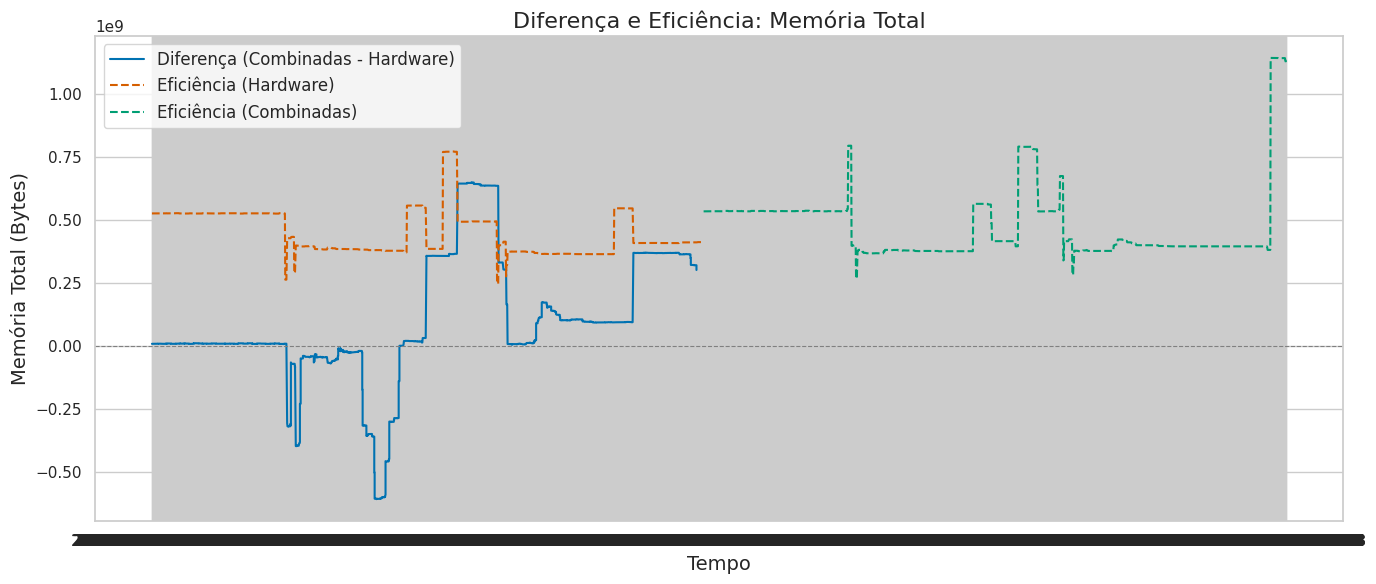

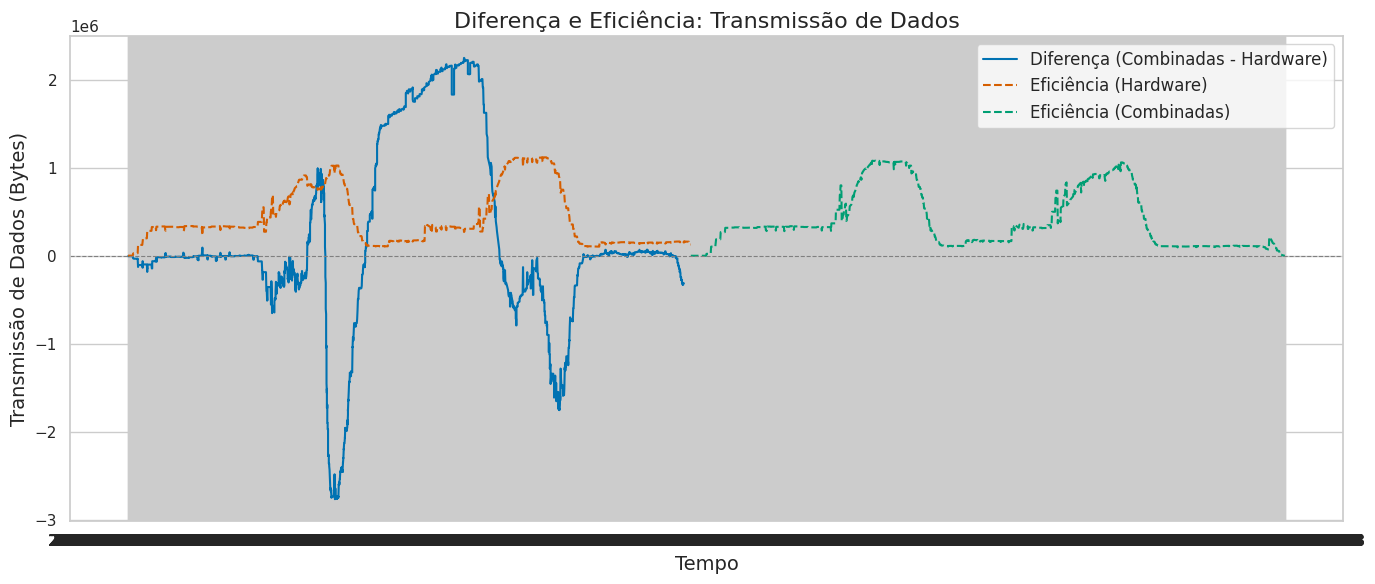

In [ ]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo
sns.set_theme(style="whitegrid")

# Função para calcular diferença relativa e eficiência por escalonamento
def analisar_ganhos(dataset_hardware, dataset_combinadas, metric, title, ylabel):
    plt.figure(figsize=(14, 6))

    # Calcular diferenças
    diff = dataset_combinadas[metric] - dataset_hardware[metric]
    efficiency_hardware = dataset_hardware[metric] / dataset_hardware["05_escalabilidade_reticulum"]
    efficiency_combinadas = dataset_combinadas[metric] / dataset_combinadas["05_escalabilidade_reticulum"]

    # Plotar diferenças
    plt.plot(dataset_hardware['timestamp'], diff, label='Diferença (Combinadas - Hardware)', color='#0072B2', linewidth=1.5)

    # Plotar eficiência por escalonamento
    plt.plot(dataset_hardware['timestamp'], efficiency_hardware, label='Eficiência (Hardware)', linestyle='--', color='#D55E00', linewidth=1.5)
    plt.plot(dataset_combinadas['timestamp'], efficiency_combinadas, label='Eficiência (Combinadas)', linestyle='--', color='#009E73', linewidth=1.5)

    # Configurações do gráfico
    plt.title(title, fontsize=16)
    plt.xlabel("Tempo", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Caminho base para os arquivos
path_base = "/content/drive/MyDrive/Mestrado/Disciplinas/6.  Elaboração de dissertação/Experimentos/03. Consolidação dos dados/dados_selecionados/"

# Ajustar os nomes dos arquivos após identificar
hardware_file = "hardware_6.csv"  # Substitua pelo nome correto
combinadas_file = "evento_hardware_1.csv"  # Substitua pelo nome correto

# Carregar os datasets
hardware_df = pd.read_csv(path_base + hardware_file)
combinadas_df = pd.read_csv(path_base + combinadas_file)

# Métricas a serem analisadas
metrics = [
    ("29_cpu_reticulum", "Diferença e Eficiência: CPU", "Uso de CPU (%)"),
    ("38_total_memoria_reticulum", "Diferença e Eficiência: Memória Total", "Memória Total (Bytes)"),
    ("69_transmissao_dados_reticulum", "Diferença e Eficiência: Transmissão de Dados", "Transmissão de Dados (Bytes)")
]

# Realizar análise para cada métrica
for metric, title, ylabel in metrics:
    analisar_ganhos(hardware_df, combinadas_df, metric, title, ylabel)


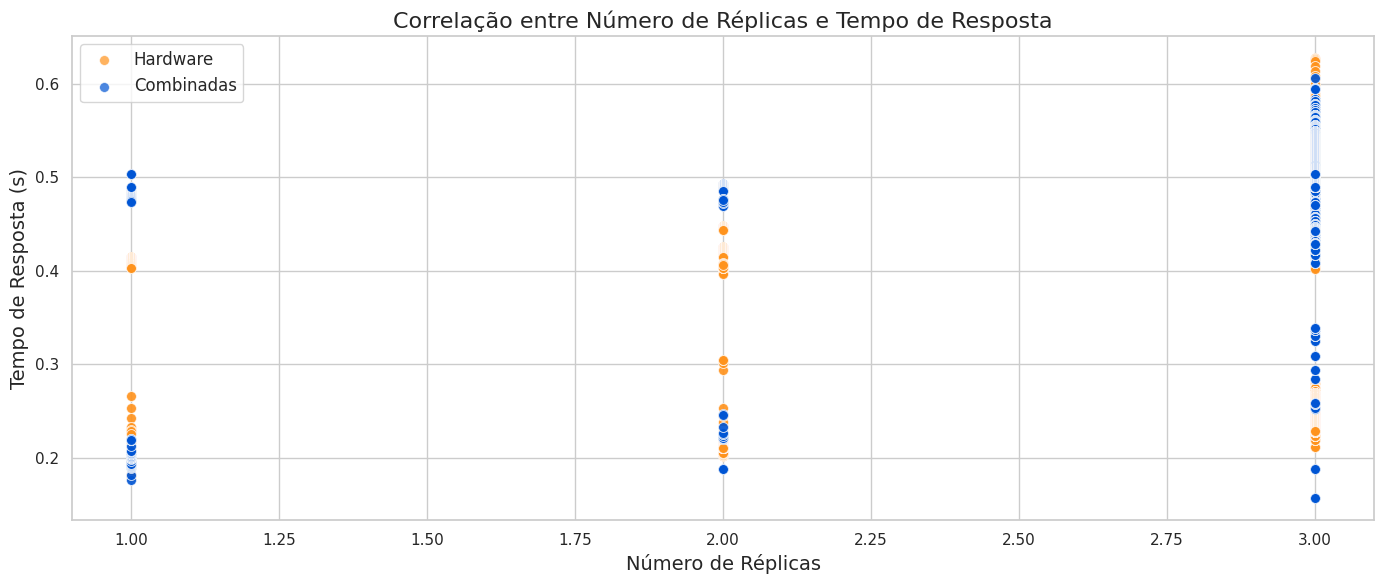

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o tema do Seaborn
sns.set_theme(style="whitegrid")

# Função para analisar tempo de resposta por escalonamento
def analisar_tempo_resposta(dataset_hardware, dataset_combinadas):
    plt.figure(figsize=(14, 6))

    # Criar scatter plot para hardware
    sns.scatterplot(
        x=dataset_hardware["05_escalabilidade_reticulum"],
        y=dataset_hardware["03_tempo_resposta"],
        label="Hardware",
        color="#ff931dff",
        alpha=0.7,
        s=50
    )

    # Criar scatter plot para combinadas
    sns.scatterplot(
        x=dataset_combinadas["05_escalabilidade_reticulum"],
        y=dataset_combinadas["03_tempo_resposta"],
        label="Combinadas",
        color="#0055d4ff",
        alpha=0.7,
        s=50
    )

    # Configurações do gráfico
    plt.title("Correlação entre Número de Réplicas e Tempo de Resposta", fontsize=16)
    plt.xlabel("Número de Réplicas", fontsize=14)
    plt.ylabel("Tempo de Resposta (s)", fontsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Caminho base para os arquivos
path_base = "/content/drive/MyDrive/Mestrado/Disciplinas/6.  Elaboração de dissertação/Experimentos/03. Consolidação dos dados/dados_selecionados/"

# Ajustar os nomes dos arquivos após identificar
hardware_file = "hardware_6.csv"  # Substitua pelo nome correto
combinadas_file = "evento_hardware_1.csv"  # Substitua pelo nome correto

# Carregar os datasets
hardware_df = pd.read_csv(path_base + hardware_file)
combinadas_df = pd.read_csv(path_base + combinadas_file)

# Executar análise
analisar_tempo_resposta(hardware_df, combinadas_df)


Resumo - Latência de Escalonamento (Hardware):
count       6.000000
mean      730.000000
std       617.057534
min       120.000000
25%       210.000000
50%       600.000000
75%      1260.000000
max      1500.000000
Name: latencia_escalonamento, dtype: float64

Resumo - Latência de Escalonamento (Combinadas):
count       6.000000
mean      930.000000
std       995.168327
min        60.000000
25%       240.000000
50%       600.000000
75%      1320.000000
max      2640.000000
Name: latencia_escalonamento, dtype: float64


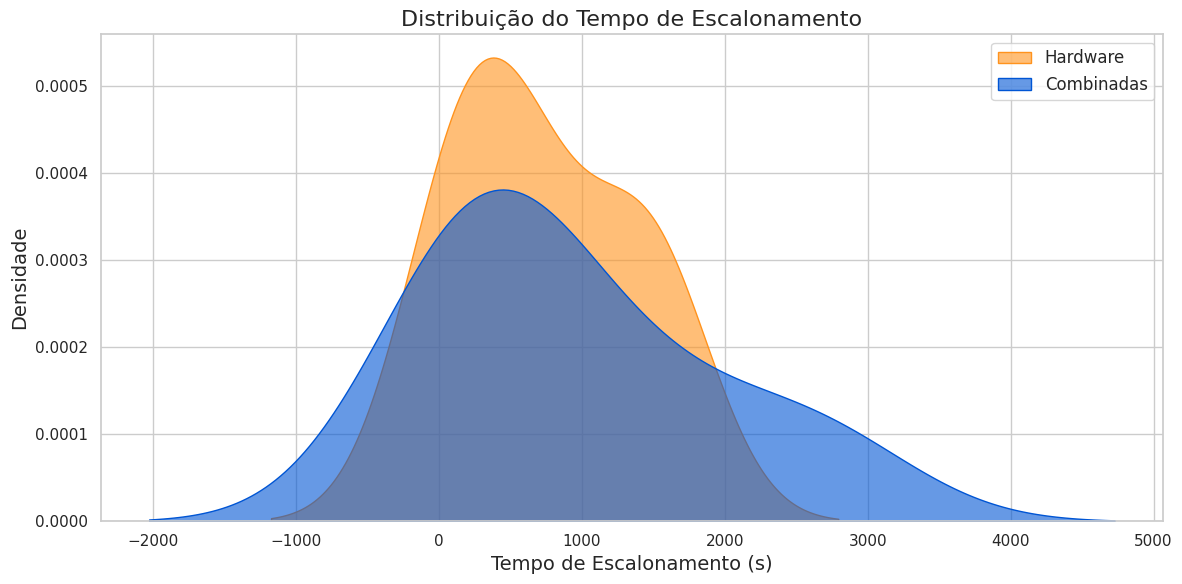

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo do gráfico
sns.set_theme(style="whitegrid")

# Função para calcular e plotar a latência de escalonamento
def analisar_tempo_escalonamento(dataset_hardware, dataset_combinadas, title):
    # Calcular diferenças no número de réplicas
    dataset_hardware['delta_replicas'] = dataset_hardware['05_escalabilidade_reticulum'].diff().fillna(0)
    dataset_combinadas['delta_replicas'] = dataset_combinadas['05_escalabilidade_reticulum'].diff().fillna(0)

    # Identificar eventos de escalonamento
    eventos_hardware = dataset_hardware[dataset_hardware['delta_replicas'] != 0].reset_index()
    eventos_combinadas = dataset_combinadas[dataset_combinadas['delta_replicas'] != 0].reset_index()

    # Calcular o tempo entre eventos consecutivos (latência)
    eventos_hardware['latencia_escalonamento'] = eventos_hardware['timestamp'].diff().dt.total_seconds()
    eventos_combinadas['latencia_escalonamento'] = eventos_combinadas['timestamp'].diff().dt.total_seconds()

    # Remover NaNs (primeiro evento não possui diferença)
    eventos_hardware = eventos_hardware.dropna(subset=['latencia_escalonamento'])
    eventos_combinadas = eventos_combinadas.dropna(subset=['latencia_escalonamento'])

    # Resumo estatístico
    print("Resumo - Latência de Escalonamento (Hardware):")
    print(eventos_hardware['latencia_escalonamento'].describe())
    print("\nResumo - Latência de Escalonamento (Combinadas):")
    print(eventos_combinadas['latencia_escalonamento'].describe())

    # Plotar a latência de escalonamento
    plt.figure(figsize=(12, 6))
    sns.kdeplot(eventos_hardware['latencia_escalonamento'], label='Hardware', color='#ff931dff', fill=True, alpha=0.6)
    sns.kdeplot(eventos_combinadas['latencia_escalonamento'], label='Combinadas', color='#0055d4ff', fill=True, alpha=0.6)
    plt.title(title, fontsize=16)
    plt.xlabel("Tempo de Escalonamento (s)", fontsize=14)
    plt.ylabel("Densidade", fontsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Caminho base para os arquivos
path_base = "/content/drive/MyDrive/Mestrado/Disciplinas/6.  Elaboração de dissertação/Experimentos/03. Consolidação dos dados/dados_selecionados/"

# Ajustar os nomes dos arquivos após identificar
hardware_file = "hardware_6.csv"  # Substitua pelo nome correto
combinadas_file = "evento_hardware_1.csv"  # Substitua pelo nome correto

# Carregar os datasets
hardware_df = pd.read_csv(path_base + hardware_file, parse_dates=['timestamp'])
combinadas_df = pd.read_csv(path_base + combinadas_file, parse_dates=['timestamp'])

# Executar análise
analisar_tempo_escalonamento(hardware_df, combinadas_df, "Distribuição do Tempo de Escalonamento")


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Selecionar métricas principais
metrics = [
    "03_tempo_resposta", "04_percentual_de_sucesso_das_requisicoes",
    "29_cpu_reticulum", "38_total_memoria_reticulum", "69_transmissao_dados_reticulum"
]

# Normalizar métricas
scaler = MinMaxScaler()
hardware_normalized = scaler.fit_transform(hardware_df[metrics])
combinadas_normalized = scaler.fit_transform(combinadas_df[metrics])

# Criar DataFrames normalizados
hardware_normalized_df = pd.DataFrame(hardware_normalized, columns=metrics)
combinadas_normalized_df = pd.DataFrame(combinadas_normalized, columns=metrics)


In [ ]:
# Pesos para cada métrica (ajuste conforme prioridade)
weights = {
    "03_tempo_resposta": 0.4,  # Tempo de resposta tem maior peso
    "04_percentual_de_sucesso_das_requisicoes": 0.2,
    "29_cpu_reticulum": 0.2,
    "38_total_memoria_reticulum": 0.1,
    "69_transmissao_dados_reticulum": 0.1
}

# Calcular scores ponderados
hardware_normalized_df["score"] = hardware_normalized_df.apply(
    lambda row: sum(row[metric] * weights[metric] for metric in metrics), axis=1
)
combinadas_normalized_df["score"] = combinadas_normalized_df.apply(
    lambda row: sum(row[metric] * weights[metric] for metric in metrics), axis=1
)

# Comparar scores médios
print("Score Médio - Hardware:", hardware_normalized_df["score"].mean())
print("Score Médio - Combinadas:", combinadas_normalized_df["score"].mean())


Score Médio - Hardware: 0.46633205928326726
Score Médio - Combinadas: 0.5898450244480553


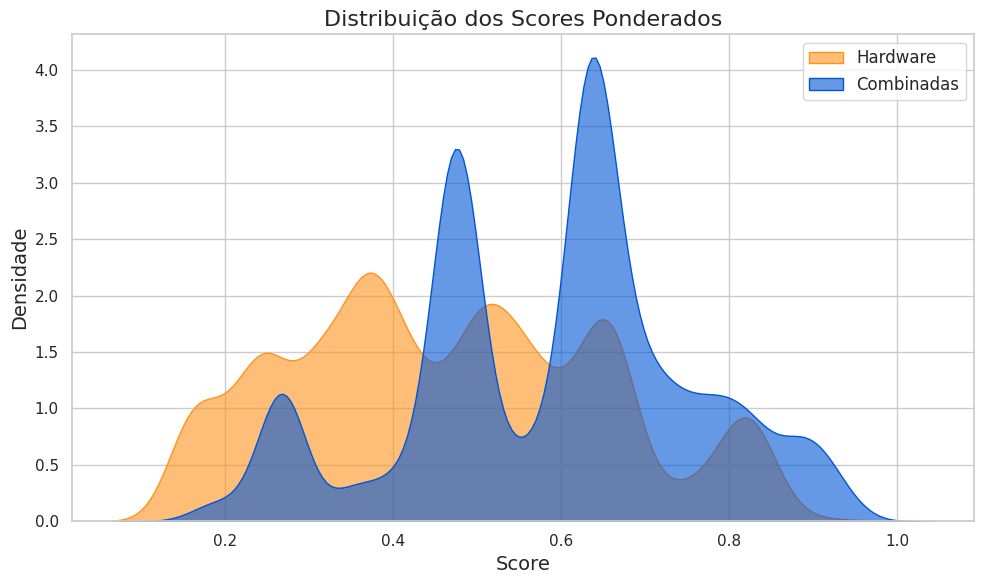

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparar scores agregados
plt.figure(figsize=(10, 6))
sns.kdeplot(hardware_normalized_df["score"], label="Hardware", fill=True, color="#ff931dff", alpha=0.6)
sns.kdeplot(combinadas_normalized_df["score"], label="Combinadas", fill=True, color="#0055d4ff", alpha=0.6)
plt.title("Distribuição dos Scores Ponderados", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Densidade", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


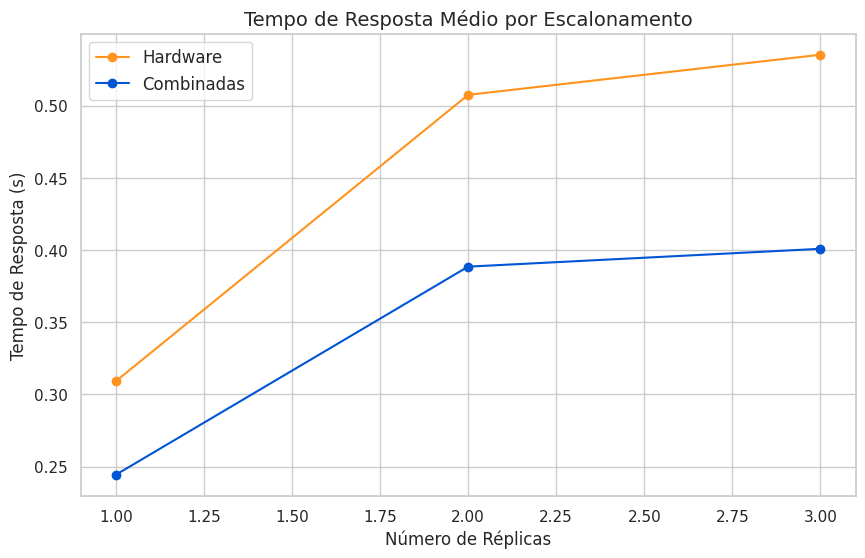

In [ ]:
import matplotlib.pyplot as plt

# Agrupar e calcular tempo de resposta médio por número de réplicas
hardware_response = hardware_df.groupby("05_escalabilidade_reticulum")["03_tempo_resposta"].mean()
combinadas_response = combinadas_df.groupby("05_escalabilidade_reticulum")["03_tempo_resposta"].mean()

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.plot(hardware_response, label="Hardware", color="#ff931d", marker="o")
plt.plot(combinadas_response, label="Combinadas", color="#0055d4", marker="o")
plt.title("Tempo de Resposta Médio por Escalonamento", fontsize=14)
plt.xlabel("Número de Réplicas", fontsize=12)
plt.ylabel("Tempo de Resposta (s)", fontsize=12)
plt.legend(fontsize=12)
plt.show()


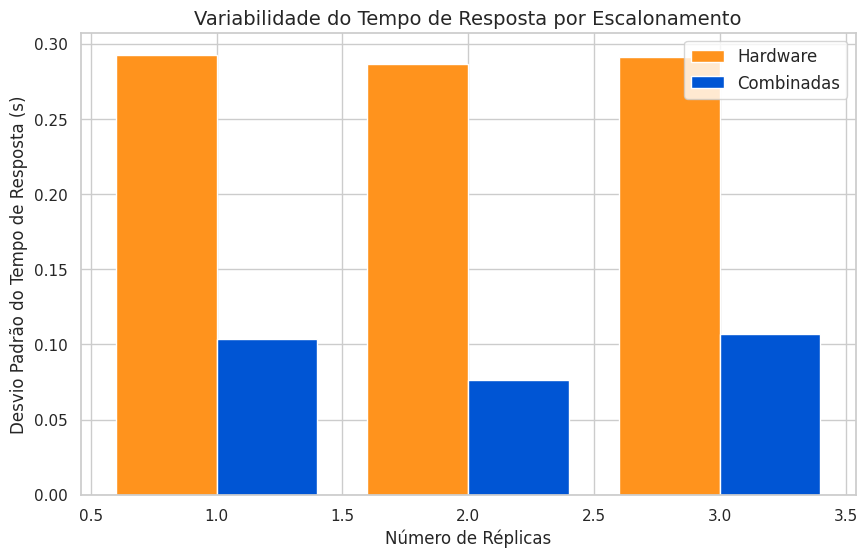

In [ ]:
# Calcular desvio padrão do tempo de resposta por número de réplicas
hardware_variability = hardware_df.groupby("05_escalabilidade_reticulum")["03_tempo_resposta"].std()
combinadas_variability = combinadas_df.groupby("05_escalabilidade_reticulum")["03_tempo_resposta"].std()

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.bar(hardware_variability.index - 0.2, hardware_variability, width=0.4, label="Hardware", color="#ff931d")
plt.bar(combinadas_variability.index + 0.2, combinadas_variability, width=0.4, label="Combinadas", color="#0055d4")
plt.title("Variabilidade do Tempo de Resposta por Escalonamento", fontsize=14)
plt.xlabel("Número de Réplicas", fontsize=12)
plt.ylabel("Desvio Padrão do Tempo de Resposta (s)", fontsize=12)
plt.legend(fontsize=12)
plt.show()


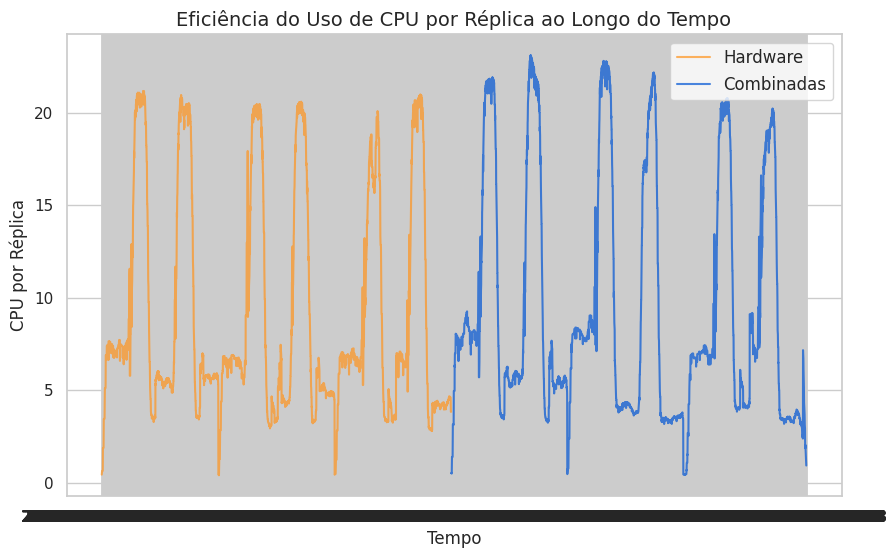

In [ ]:
# Calcular eficiência
hardware_df["CPU_por_Réplica"] = hardware_df["29_cpu_reticulum"] / hardware_df["05_escalabilidade_reticulum"]
combinadas_df["CPU_por_Réplica"] = combinadas_df["29_cpu_reticulum"] / combinadas_df["05_escalabilidade_reticulum"]

# Plotar eficiência
plt.figure(figsize=(10, 6))
plt.plot(hardware_df["timestamp"], hardware_df["CPU_por_Réplica"], label="Hardware", color="#ff931d", alpha=0.7)
plt.plot(combinadas_df["timestamp"], combinadas_df["CPU_por_Réplica"], label="Combinadas", color="#0055d4", alpha=0.7)
plt.title("Eficiência do Uso de CPU por Réplica ao Longo do Tempo", fontsize=14)
plt.xlabel("Tempo", fontsize=12)
plt.ylabel("CPU por Réplica", fontsize=12)
plt.legend(fontsize=12)
plt.show()


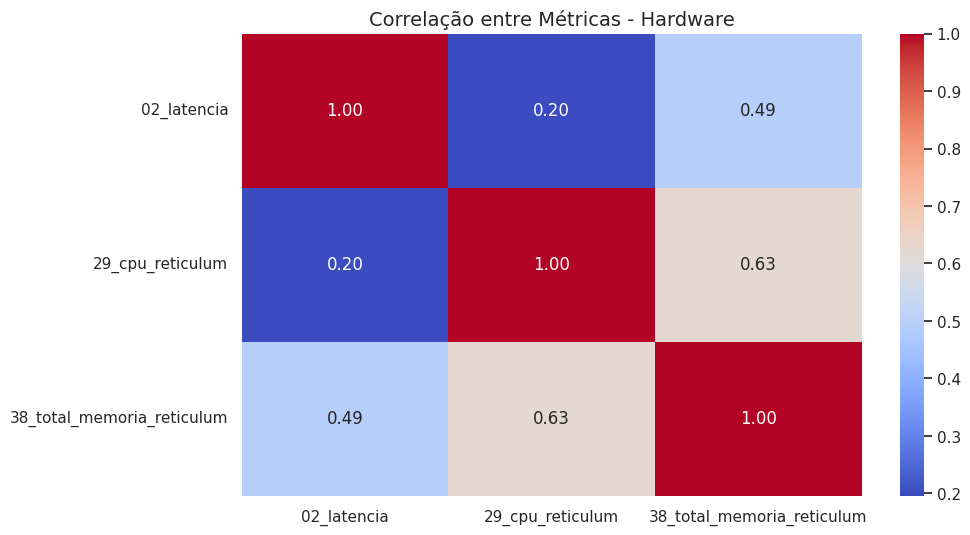

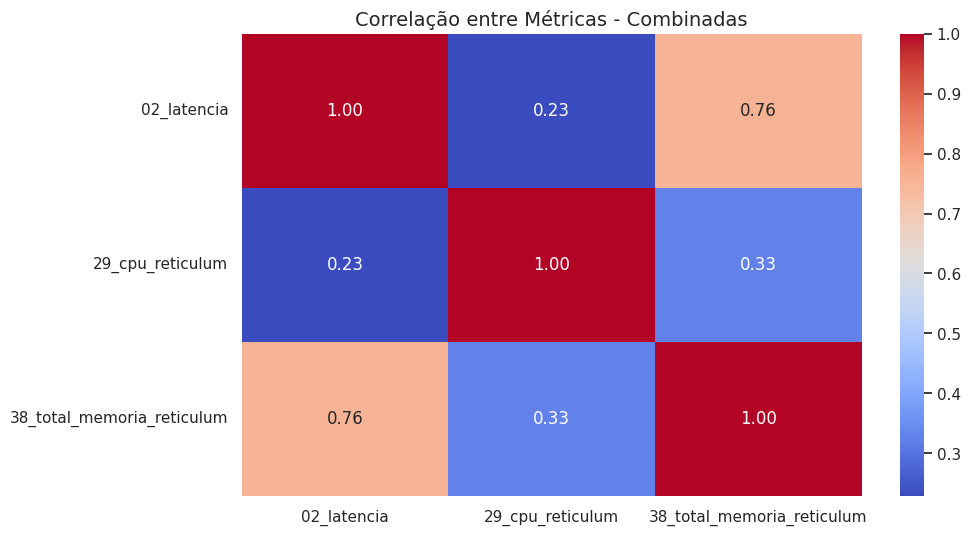

In [ ]:
import seaborn as sns

# Selecionar métricas relevantes
metrics_hardware = hardware_df[["02_latencia", "29_cpu_reticulum", "38_total_memoria_reticulum"]]
metrics_combinadas = combinadas_df[["02_latencia", "29_cpu_reticulum", "38_total_memoria_reticulum"]]

# Calcular correlações
correlation_hardware = metrics_hardware.corr()
correlation_combinadas = metrics_combinadas.corr()

# Plotar heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_hardware, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Métricas - Hardware", fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_combinadas, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Métricas - Combinadas", fontsize=14)
plt.show()


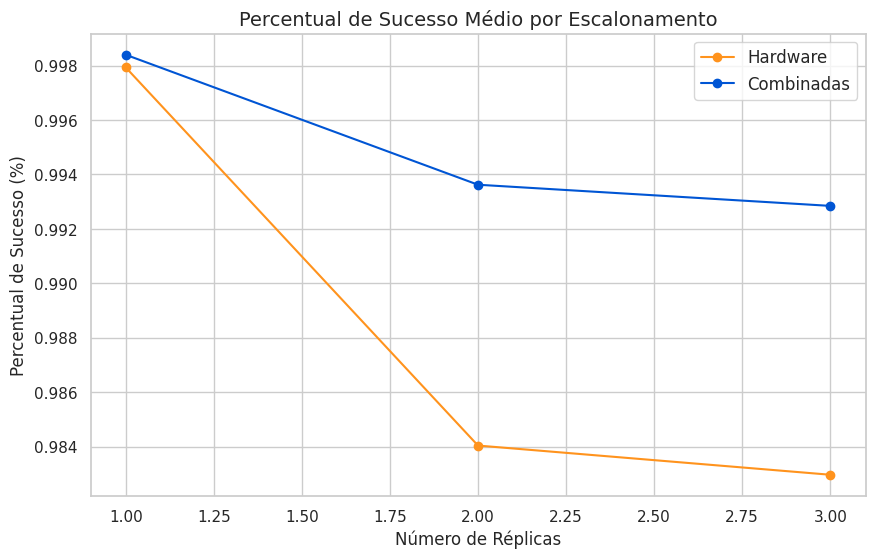

In [ ]:
# Percentual de sucesso médio por número de réplicas
hardware_success = hardware_df.groupby("05_escalabilidade_reticulum")["04_percentual_de_sucesso_das_requisicoes"].mean()
combinadas_success = combinadas_df.groupby("05_escalabilidade_reticulum")["04_percentual_de_sucesso_das_requisicoes"].mean()

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.plot(hardware_success, label="Hardware", color="#ff931d", marker="o")
plt.plot(combinadas_success, label="Combinadas", color="#0055d4", marker="o")
plt.title("Percentual de Sucesso Médio por Escalonamento", fontsize=14)
plt.xlabel("Número de Réplicas", fontsize=12)
plt.ylabel("Percentual de Sucesso (%)", fontsize=12)
plt.legend(fontsize=12)
plt.show()
